In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data
train = pd.read_csv('train.csv')
Y = train['Survived']
train.drop(['PassengerId'],axis = 1 ,inplace = True)
test = pd.read_csv('test.csv')
test_id = test['PassengerId']
test.drop(['PassengerId'],axis = 1,inplace = True)

# Exploratory data analysis

### Numerical data

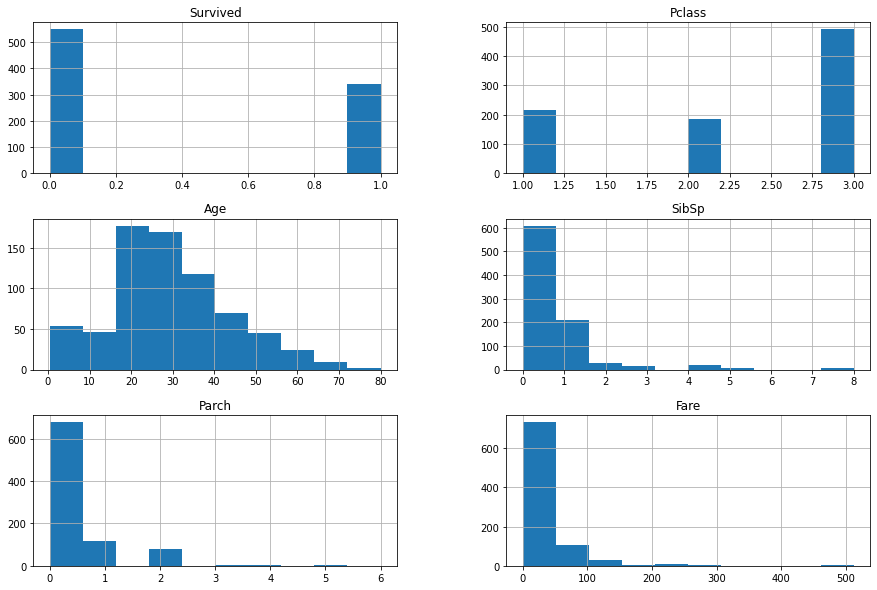

In [3]:
def plot_hist(df):
    df.hist(figsize = (15,10))
    plt.show()

    #df.boxplot(figsize = (20,15))
    #plt.show()
plot_hist(train)

Correlation and data description. I used matrix correlation method and a heat map so see the correlations in numerical data, but since Survived is a binary variable I also used point biserial correlation to confirm the data.

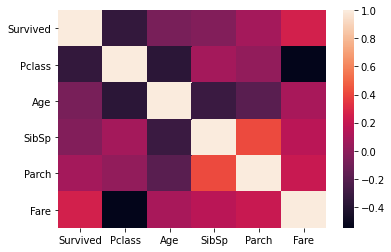

In [4]:
from scipy import stats
numerical = ['Pclass','Parch','Fare']
def correlation_describe(df,numerical):
    
    #df['Age']=df['Age'].fillna(df['Age'].median())
    corr = {}
    for num in numerical:
        corr_values = stats.pointbiserialr(df['Survived'],df[num])
        corr[num] = corr_values
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix)
    desc = df.describe()
    return desc, corr , corr_matrix
desc,corr,corr_matrix = correlation_describe(train,numerical)



In [5]:
corr,corr_matrix,desc

({'Pclass': PointbiserialrResult(correlation=-0.33848103596101514, pvalue=2.5370473879790813e-25),
  'Parch': PointbiserialrResult(correlation=0.08162940708348344, pvalue=0.014799245374712841),
  'Fare': PointbiserialrResult(correlation=0.2573065223849624, pvalue=6.120189341917992e-15)},
           Survived    Pclass       Age     SibSp     Parch      Fare
 Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
 Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
 Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
 SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
 Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
 Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000,
          Survived      Pclass         Age       SibSp       Parch        Fare
 count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
 mean     0.383838    2.308642   29.699118    0.523008    0.38

In [6]:
train_copy = train.copy()
#train_copy.drop(['Survived'],axis = 1,inplace = True)

# Prepare data

Get the person's title from the name. Mr, Mrs and Miss


In [7]:
def get_title(df): 
    df['title'] = df['Name'].str.split(',',expand = True)[1].str.split('.',expand = True)[0]
    mr_values =['Don','Rev','Dr','Major','Col','Capt','Jonkheer','Sir','Master']
    mrs_replace = ['Mme','Dona','the Countess','Mra','Lady']
    miss_replace = ['Ms','Mlle']
    df['title'] = df['title'].replace(mr_values,'Mr',regex = True)
    df['title'] = df['title'].replace(mrs_replace,'Mrs',regex = True)
    df['title'] = df['title'].replace(miss_replace,'Miss',regex = True)
    return df
train = get_title(train)
test = get_title(test)

### Create a new set of features. 

Family size: based on SibSp plus Parch 

Person fare: is the total fare divided by family_size

Deck : The first letter of the cabin tell us the deck where they were located. 

Have cabin: Whether or not the passenger has a cabin, based on the Cabin feature

In [8]:
def features(df):
    df['family_size'] = df['SibSp'] + df['Parch'] + 1
    df['person_fare'] = df['Fare'] / df['family_size']
    df['Cabin'] = df['Cabin'].fillna('0')
    df['Deck'] = df['Cabin'].astype(str).str[0]
    df['Have Cabin'] = (df['Cabin'] != '0').astype(int)
    df.drop('Cabin',axis = 1,inplace = True)
    return df
train_copy = features(train)
test_copy = features(test)
train_copy


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,family_size,person_fare,Deck,Have Cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2,3.62500,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2,35.64165,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,7.92500,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2,26.55000,C,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,8.05000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Mr,1,13.00000,0,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,1,30.00000,B,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss,4,5.86250,0,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,1,30.00000,C,1


Look for new correlations in the new features

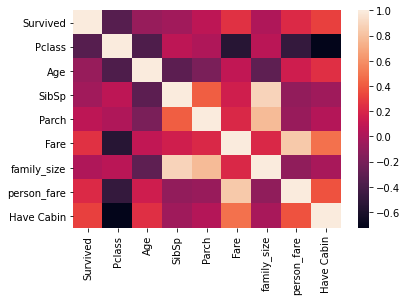

In [9]:
new_numerical = numerical
new_numerical.append('family_size')
new_numerical.append('Have Cabin')
new_numerical.append('person_fare')
correlation_describe(train_copy,new_numerical)
new_numerical.append('Age')

In [10]:
train_copy.drop(['Survived','Ticket','Name'],axis = 1, inplace = True)
test_copy.drop(['Ticket','Name'],axis = 1 , inplace =True)

In [11]:
categorical = ['Sex','Embarked','Deck','title']


# Create a test set and prepare data for the model


Create a test set.

Fill missing values and transform data using one hot encoding and standard scaler

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [13]:
X_train,X_test,y_train,y_test = train_test_split(train_copy,Y,random_state = 0)

In [14]:
transformed = ColumnTransformer([
    ('median',SimpleImputer(strategy = 'median'),new_numerical),
    ('most_frequent',SimpleImputer(strategy = 'most_frequent'),categorical),
    ('encoder',OneHotEncoder(),categorical)
],remainder = 'passthrough')
transformed.fit(X_train)

def transform(df):
    df_transformed = transformed.transform(df)
    df_transformed = pd.DataFrame(df_transformed)
    df_transformed = df_transformed.drop([7,8,9,10],axis = 1)
    return df_transformed

In [15]:
X_train_transformed = transform(X_train)
test_transformed = transform(test_copy)
X_test_transformed = transform(X_test)

scaler = StandardScaler().fit(X_train_transformed)


X_train_scaled = scaler.transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)
test_scaled = scaler.transform(test_transformed)


### Model

In [26]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

In [36]:
models = [GradientBoostingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier(),LogisticRegression(),SVC()]
train_pred = {}
def model_selection(X_train,y_train,models):
    for model in models:
        model.fit(X_train,y_train)
        pred = model.predict(X_train)
        score = model.score(X_train,y_train)
        train_pred[model] = score
    return train_pred

In [37]:
model_selection(X_train_scaled,y_train,models)

{GradientBoostingClassifier(): 0.9131736526946108,
 RandomForestClassifier(): 0.9820359281437125,
 AdaBoostClassifier(): 0.8413173652694611,
 DecisionTreeClassifier(): 0.9820359281437125,
 LogisticRegression(): 0.8158682634730539,
 SVC(): 0.8368263473053892}

In [38]:
cross_val_scores = {}
def cross_val(X_train,y_train,models):    
    for model in models:
        scores = cross_val_score(model,X_train,y_train,cv=5,scoring = 'accuracy')
        cross_val_scores[model] = [scores,scores.mean()]
    return cross_val_scores
cross_val(X_train_scaled,y_train,models)
        

{GradientBoostingClassifier(): [array([0.80597015, 0.82835821, 0.7761194 , 0.82706767, 0.81954887]),
  0.8114128605094827],
 RandomForestClassifier(): [array([0.79104478, 0.80597015, 0.78358209, 0.76691729, 0.78195489]),
  0.7858938390753002],
 AdaBoostClassifier(): [array([0.7761194 , 0.81343284, 0.75373134, 0.79699248, 0.78195489]),
  0.7844461901021209],
 DecisionTreeClassifier(): [array([0.75373134, 0.76119403, 0.76119403, 0.72932331, 0.80451128]),
  0.7619907978902478],
 LogisticRegression(): [array([0.7761194 , 0.80597015, 0.80597015, 0.80451128, 0.81954887]),
  0.8024239703736955],
 SVC(): [array([0.79104478, 0.82089552, 0.76865672, 0.81954887, 0.83458647]),
  0.8069464706542476]}

In [55]:
param_grid_gbclf = {'learning_rate':[0.001,0.01,0.05,0.08,0.1],'subsample': [0.3,0.5,0.8,1],'n_estimators':[300,500,800,1500],'max_features':[6,7,8,9,10]}
param_grid_RF = {'n_estimators':[100,300,500,800,1500],'max_features':[1,4,6,7,8,9,10],'max_depth' : [None,1, 3, 5 ,7,10,12]}
param_grid_ada = {'n_estimators':[10,30,50,80,100,150],'learning_rate':[0.1,0.5,0.8,1,1.5,1.8,2],'algorithm':['SAMME','SAMME.R']}
param_grid_DTclf = {'max_features':[1,4,6,7,8,9,10],'max_depth' : [None,1, 3, 5 ,7,10,12]}
param_grid_log = {'C' : [0.01,0.05,0.1,0.5,1,1.3,1.5,2]}
param_grid_svc = {'C':[0.01,0.05,0.1,0.5,1,1.3,1.5,2],'kernel':['linear','poly','sigmoid','rbf'],'gamma':['scale','auto']}


In [60]:
gb_clf = GradientBoostingClassifier()
def grid_searchCV_gbc(param_grid,model,X_train,y_train):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    train_score = gs.score(X_train,y_train)
    best_params = gs.best_params_
    gbclf_cv = {'model':model,'score':train_score,'best_params':best_params}
    return gbclf_cv
grid_searchCV_gbc(param_grid_gbclf,gb_clf,X_train_scaled,y_train)

{'model': GradientBoostingClassifier(),
 'score': 0.8517964071856288,
 'best_params': {'learning_rate': 0.01,
  'max_features': 10,
  'n_estimators': 300,
  'subsample': 0.3}}

In [61]:
rf_clf = RandomForestClassifier()
def grid_searchCV_rf(param_grid,model,X_train,y_train):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    train_score = gs.score(X_train,y_train)
    best_params = gs.best_params_
    rf_clf_cv = {'model':model,'score':train_score,'best_params':best_params}
    return rf_clf_cv
grid_searchCV_rf(param_grid_RF,rf_clf,X_train_scaled,y_train)

{'model': RandomForestClassifier(),
 'score': 0.8592814371257484,
 'best_params': {'max_depth': 5, 'max_features': 9, 'n_estimators': 100}}

In [62]:
ada_clf = AdaBoostClassifier()
def grid_searchCV_ada(param_grid,model,X_train,y_train):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    train_score = gs.score(X_train,y_train)
    best_params = gs.best_params_
    ada_clf_cv = {'model':model,'score':train_score,'best_params':best_params}
    return ada_clf_cv
grid_searchCV_ada(param_grid_ada,ada_clf,X_train_scaled,y_train)

{'model': AdaBoostClassifier(),
 'score': 0.8203592814371258,
 'best_params': {'algorithm': 'SAMME',
  'learning_rate': 0.8,
  'n_estimators': 50}}

In [63]:
dt_clf = DecisionTreeClassifier()
def grid_searchCV_dt(param_grid,model,X_train,y_train):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    train_score = gs.score(X_train,y_train)
    best_params = gs.best_params_
    dt_clf_cv = {'model':model,'score':train_score,'best_params':best_params}
    return dt_clf_cv
grid_searchCV_dt(param_grid_DTclf,dt_clf,X_train_scaled,y_train)

{'model': DecisionTreeClassifier(),
 'score': 0.874251497005988,
 'best_params': {'max_depth': 7, 'max_features': 8}}

In [64]:
log_reg = LogisticRegression()
def grid_searchCV_log(param_grid,model,X_train,y_train):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    train_score = gs.score(X_train,y_train)
    best_params = gs.best_params_
    log_reg_cv = {'model':model,'score':train_score,'best_params':best_params}
    return log_reg_cv
grid_searchCV_dt(param_grid_log,log_reg,X_train_scaled,y_train)

{'model': LogisticRegression(),
 'score': 0.8188622754491018,
 'best_params': {'C': 0.1}}

In [65]:
svc = SVC()
def grid_searchCV_svc(param_grid,model,X_train,y_train):
    gs = GridSearchCV(model,param_grid).fit(X_train,y_train)
    train_score = gs.score(X_train,y_train)
    best_params = gs.best_params_
    svc_cv = {'model':model,'score':train_score,'best_params':best_params}
    return svc_cv
grid_searchCV_svc(param_grid_svc,svc,X_train_scaled,y_train)

{'model': SVC(),
 'score': 0.8502994011976048,
 'best_params': {'C': 1.5, 'gamma': 'auto', 'kernel': 'poly'}}

In [74]:
dt_model = DecisionTreeClassifier(max_depth = 7,max_features = 8)
dt_model.fit(X_train_scaled,y_train)
pred = dt_model.predict(X_test_scaled)
score_acc = accuracy_score(y_test,pred)
score_acc

0.8251121076233184

In [75]:
final_pred = dt_model.predict(test_scaled)

In [79]:
final_submission = pd.DataFrame({'PassangerId':test_id,'Survived':final_pred})
final_submission.to_csv('final_submission.csv',index=False)

In [77]:
final_submission

,PassangerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


0.8626716604244694
0.8666666666666667
{'learning_rate': 1.5, 'n_estimators': 50}


In [31]:
## MODEL IN TEST DATA

In [93]:
def final_models(X,Y,X_test,id):
    gbc = GradientBoostingClassifier(learning_rate=0.1,subsample = 1,max_features = 7,n_estimators =300)
    rf =  RandomForestClassifier(n_estimators= 500,max_features=6,max_depth=10)
    ada = AdaBoostClassifier(n_estimators = 50,learning_rate = 1.5)
    models = [gbc,rf,ada]
    for model in models:
        model.fit(X,Y)
        pred = model.predict(X_test)
        submission = pd.DataFrame({'PassengerID': id, 'Survived': pred})
        submission.to_csv('submission{}.csv'.format(model),index=False)

    
    
    
    
    ##gbc = GradientBoostingClassifier(learning_rate=0.1,subsample = 1,max_features = 7,n_estimators =300).fit(X,Y)
    #gbc_prediction = gbc.predict(X_test)
    #rf = rRandomForestClassifier(n_estimators= 500,max_features=6,max_depth=10).fit(X,Y)
    #rf_prediction = rf.predict(X_test)
    #ada = AdaBoostClassifier(n_estimators = 50,learning_rate = 1.5).fit(X,Y)
    #ada_predict = ada.predict(X_test)


    #gbc_submission = pd.DataFrame({'PassengerId' : id,'Survived': gbc_prediction})
    #gbc_submission.to_csv('gbc_submission.csv',index = False)

In [94]:
final_models(train_data,Y,test_data,id)